# import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# loading dataset

In [2]:
df = pd.read_csv('loan prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Data analysis/data preprocessing


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [6]:
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


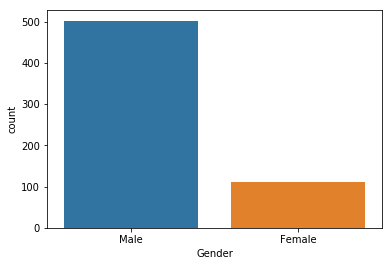

In [9]:
# lets analyse the continous variable for this we need to plot the histogram for continous distribution
sns.countplot(df['Gender'])

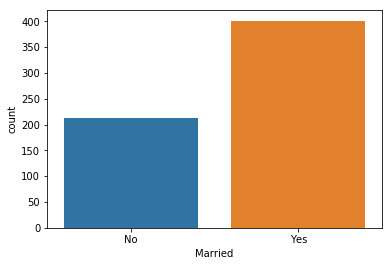

In [10]:
sns.countplot(df['Married'])

In [11]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

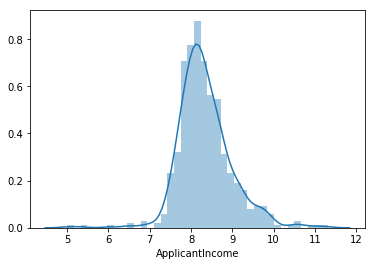

In [12]:
sns.distplot(df['ApplicantIncome'])

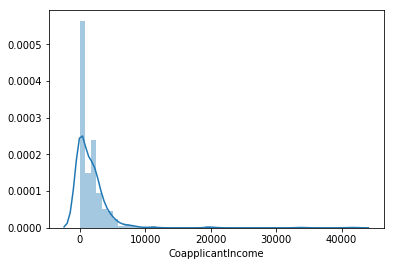

In [13]:
sns.distplot(df['CoapplicantIncome'])

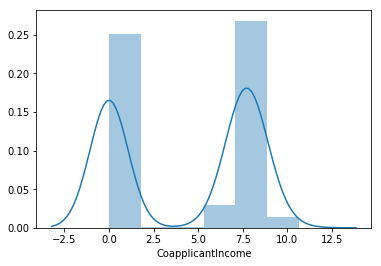

In [14]:
df['CoapplicantIncome'] = np.log(1+df['CoapplicantIncome'])
sns.distplot(df["CoapplicantIncome"])

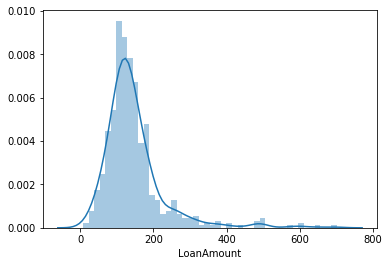

In [15]:
sns.distplot(df["LoanAmount"])

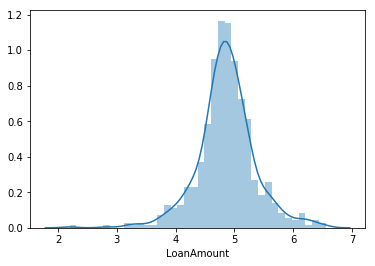

In [16]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmount"])

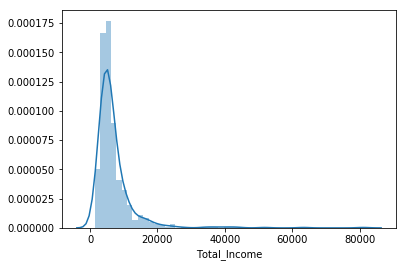

In [17]:
sns.distplot(df['Total_Income'])

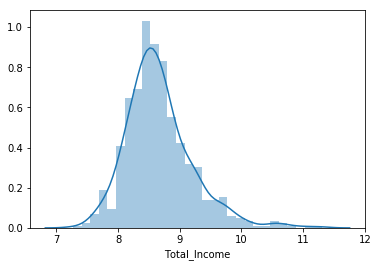

In [18]:
df['Total_Income'] = np.log(df['Total_Income'])
sns.distplot(df["Total_Income"])

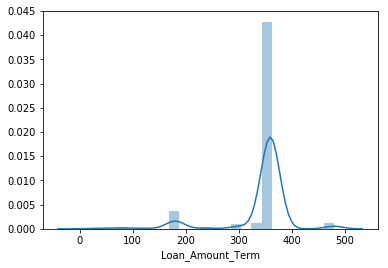

In [19]:
sns.distplot(df['Loan_Amount_Term'])

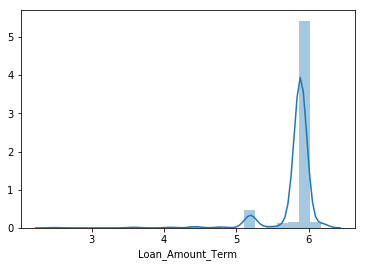

In [20]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term"])

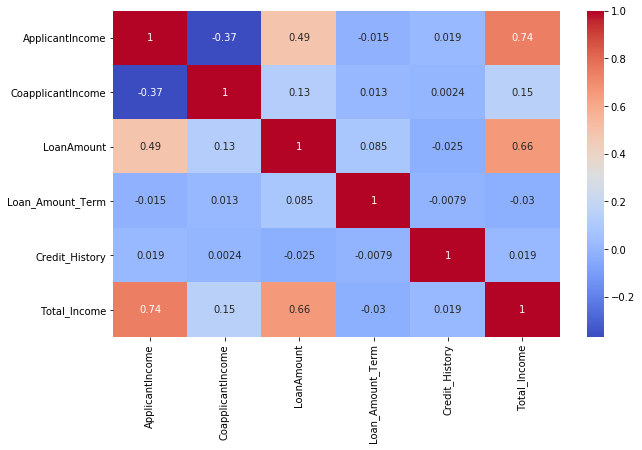

In [21]:
# correlation
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y,8.505323
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y,8.699515


In [23]:
col = ['Loan_ID','CoapplicantIncome']
df = df.drop(columns=col,axis=1)

In [24]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,8.674026,4.986426,5.886104,1.0,Urban,Y,8.674026
1,Male,Yes,1,Graduate,No,8.430109,4.852030,5.886104,1.0,Rural,N,8.714568
2,Male,Yes,0,Graduate,Yes,8.006368,4.189655,5.886104,1.0,Urban,Y,8.006368
3,Male,Yes,0,Not Graduate,No,7.856707,4.787492,5.886104,1.0,Urban,Y,8.505323
4,Male,No,0,Graduate,No,8.699515,4.948760,5.886104,1.0,Urban,Y,8.699515


# label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

In [26]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
for col in cols:
    df[col] = l.fit_transform(df[col])

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,8.674026,4.986426,5.886104,1.0,2,1,8.674026
1,1,1,1,0,0,8.430109,4.852030,5.886104,1.0,0,0,8.714568
2,1,1,0,0,1,8.006368,4.189655,5.886104,1.0,2,1,8.006368
3,1,1,0,1,0,7.856707,4.787492,5.886104,1.0,2,1,8.505323
4,1,0,0,0,0,8.699515,4.948760,5.886104,1.0,2,1,8.699515


In [28]:
X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']

# train test split

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

/home/shubham/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
print(LR.score(X_test,y_test))

0.7922077922077922


In [37]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(LR,X,y,cv=5)

In [38]:
print(np.mean(score))

0.8079587519830778


In [35]:
from sklearn.metrics import f1_score,classification_report,confusion_matrix

In [39]:
m_predict = LR.predict(X_test)
confusion_matrix(y_test,m_predict)

array([[ 22,  30],
       [  2, 100]])

In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [41]:
RF.fit(X_train,y_train)

/home/shubham/.local/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
print(RF.score(X_test,y_test))

0.7402597402597403


In [43]:
score = cross_val_score(RF,X,y,cv=5)
print(np.mean(score))

0.7592014806980434


In [44]:
m_predict = LR.predict(X_test)
l_predict = confusion_matrix(y_test,m_predict)
l_predict

array([[ 22,  30],
       [  2, 100]])

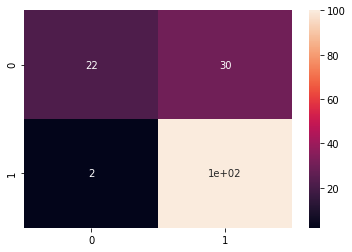

In [46]:
sns.heatmap(l_predict,annot=True)

In [47]:
# [TN FN]
#  FP TP

In [48]:
from sklearn.metrics import f1_score

In [49]:
f1_score(y_test,m_predict)

0.8620689655172413